In [1]:
import os
import os.path as osp
from os.path import join as pjoin
import time
from datetime import datetime
import json

import numpy as np
np.seterr(all='raise')
from PIL import Image

from lpf.data import load_model_dicts
from lpf.initializers import LiawInitializer
from lpf.models import LiawModel
from lpf.solvers import EulerSolver, RungeKuttaSolver

In [2]:
batch_size = 1  # A single set of parameters
device = "cpu"  # Device option: CPU or GPU

# Time parameters
dt = 0.01
n_iters = 500000

# Space parameters
dx = 0.1
width = 128
height = 128
shape = (height, width)

In [3]:
# Create the output directory.
str_now = datetime.now().strftime('%Y%m%d-%H%M%S')
dpath_output = pjoin(osp.abspath("./output"), "experiment_batch_%s" % (str_now))
os.makedirs(dpath_output, exist_ok=True)

In [4]:
# Create a dict for parameters.
param_dict = param_dict = {
    "u0": 2.0, "v0": 1.0,
    "Du": 0.0005, "Dv": 0.075,
    "ru": 0.18, "rv": 0.02874,
    "su": 0.001, "sv": 0.025, 
    "k": 0.084, 
    "mu": 0.08     
}

In [5]:
# In this example, we use random positions for initializing u with u0.
for i in range(25):
    param_dict["init_pts_%d"%(i+1)] = (np.random.randint(0, height), np.random.randint(0, width))

In [6]:
param_dict

{'u0': 2.0,
 'v0': 1.0,
 'Du': 0.0005,
 'Dv': 0.075,
 'ru': 0.18,
 'rv': 0.02874,
 'su': 0.001,
 'sv': 0.025,
 'k': 0.084,
 'mu': 0.08,
 'init_pts_1': (75, 37),
 'init_pts_2': (82, 116),
 'init_pts_3': (0, 49),
 'init_pts_4': (62, 28),
 'init_pts_5': (21, 63),
 'init_pts_6': (116, 90),
 'init_pts_7': (26, 67),
 'init_pts_8': (40, 83),
 'init_pts_9': (31, 89),
 'init_pts_10': (108, 78),
 'init_pts_11': (16, 10),
 'init_pts_12': (96, 103),
 'init_pts_13': (96, 50),
 'init_pts_14': (2, 5),
 'init_pts_15': (56, 17),
 'init_pts_16': (1, 47),
 'init_pts_17': (84, 100),
 'init_pts_18': (104, 25),
 'init_pts_19': (73, 5),
 'init_pts_20': (113, 93),
 'init_pts_21': (14, 80),
 'init_pts_22': (107, 49),
 'init_pts_23': (111, 97),
 'init_pts_24': (37, 87),
 'init_pts_25': (93, 12)}

In [7]:
param_dicts = []
param_dicts.append(param_dict)

In [8]:
# Create the Liaw initializer.
initializer = LiawInitializer()
initializer.update(param_dicts)
params = LiawModel.parse_params(param_dicts)

In [9]:
# Create the Liaw model.
model = LiawModel(
    initializer=initializer,
    params=params,
    dx=dx,
    width=width,
    height=height,
    device=device
)

In [10]:
# Create the Euler solver.
solver = EulerSolver()

t_beg = time.time()

solver.solve(
    model=model,
    dt=dt,
    n_iters=n_iters,
    period_output=50000,
    dpath_model=dpath_output,
    dpath_ladybird=dpath_output,
    dpath_pattern=dpath_output,
    verbose=1
)

t_end = time.time()

print("Elapsed time: %f sec." % (t_end - t_beg))

- [Iteration #1] elapsed time: 2.80073e-02 sec.
- [Iteration #50000] elapsed time: 1.01931e+01 sec.
- [Iteration #100000] elapsed time: 9.93083e+00 sec.
- [Iteration #150000] elapsed time: 1.02310e+01 sec.
- [Iteration #200000] elapsed time: 1.02328e+01 sec.
- [Iteration #250000] elapsed time: 1.01688e+01 sec.
- [Iteration #300000] elapsed time: 1.03601e+01 sec.
- [Iteration #350000] elapsed time: 1.00627e+01 sec.
- [Iteration #400000] elapsed time: 1.00682e+01 sec.
- [Iteration #450000] elapsed time: 1.02887e+01 sec.
- [Iteration #500000] elapsed time: 9.95443e+00 sec.
- [Duration] : 1.01541e+02 sec.
Elapsed time: 101.540606 sec.


In [11]:
# Sub-directories in the output directory
!ls {dpath_output}

model_1
models


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1be2b72bac0>
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [12]:
# Generated images
dpath_images = pjoin(dpath_output, "model_1")
!ls {dpath_images}

ladybird_000001.png
ladybird_050000.png
ladybird_100000.png
ladybird_150000.png
ladybird_200000.png
ladybird_250000.png
ladybird_300000.png
ladybird_350000.png
ladybird_400000.png
ladybird_450000.png
ladybird_500000.png
pattern_000001.png
pattern_050000.png
pattern_100000.png
pattern_150000.png
pattern_200000.png
pattern_250000.png
pattern_300000.png
pattern_350000.png
pattern_400000.png
pattern_450000.png
pattern_500000.png


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1be2a6e8ca0>


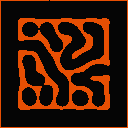

In [13]:
# Show the pattern at last.
img_pattern = Image.open(pjoin(dpath_images, "pattern_500000.png"))
img_pattern

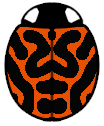

In [14]:
img_ladybird = Image.open(pjoin(dpath_images, "ladybird_500000.png"))
img_ladybird

In [15]:
# Model file
!ls {pjoin(dpath_output, "models")}

model_1.json


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1be797a2400>


In [16]:
fpath_model = pjoin(dpath_output, "models", "model_1.json")
with open(fpath_model, "rt") as fin:
    model_dict = json.load(fin)
    
model_dict

{'index': 0,
 'generation': None,
 'fitness': None,
 'Du': 0.0005,
 'Dv': 0.075,
 'ru': 0.18,
 'rv': 0.02874,
 'k': 0.084,
 'su': 0.001,
 'sv': 0.025,
 'mu': 0.08,
 'width': 128,
 'height': 128,
 'dx': 0.1,
 'thr_color': 0.5,
 'color_u': [5, 5, 5],
 'color_v': [231, 79, 3],
 'initializer': 'LiawInitializer',
 'u0': 2.0,
 'v0': 1.0,
 'n_init_pts': 25,
 'init_pts_0': [75, 37],
 'init_pts_1': [82, 116],
 'init_pts_2': [0, 49],
 'init_pts_3': [62, 28],
 'init_pts_4': [21, 63],
 'init_pts_5': [116, 90],
 'init_pts_6': [26, 67],
 'init_pts_7': [40, 83],
 'init_pts_8': [31, 89],
 'init_pts_9': [108, 78],
 'init_pts_10': [16, 10],
 'init_pts_11': [96, 103],
 'init_pts_12': [96, 50],
 'init_pts_13': [2, 5],
 'init_pts_14': [56, 17],
 'init_pts_15': [1, 47],
 'init_pts_16': [84, 100],
 'init_pts_17': [104, 25],
 'init_pts_18': [73, 5],
 'init_pts_19': [113, 93],
 'init_pts_20': [14, 80],
 'init_pts_21': [107, 49],
 'init_pts_22': [111, 97],
 'init_pts_23': [37, 87],
 'init_pts_24': [93, 12],
 's